# Clustering

One of the most common use cases in unsupervised machine learning is the identification of clusters - discrete groups of samples which are somehow closer related to samples within the same cluster than they are with those outside. Once we abstract our data in to a general *d*-dimensional space of N samples, we can quickly start to apply our intuition to how to determine cluster membership. 

### Learning motivation / points to consider

- You may be wondering which clustering algorithm is the best to find "natural subgroups" in your data?
- Well, the nature of the data will answer that question. 
- Is anything known about the underlying structure? 
- Are you looking for a specific number of clusters? 
- So, unfortunately, you need to have various algorithms in your toolbox, ready to deploy as the circumstances dictate 

 (k-means is not the solution to everything...)

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### K-Means clustering
This is among the most common clustering algorithms. 

<img src="assets/KMeans_animation.gif" style="float:left"/>

Assuming we know *a priori* the number of clusters (k), the algorithm starts by placing k coordinates (centroides c) in the feature space. First all samples are assigned to their closest centroid. Once assigned, we update the centroid location as the mean of all the samples belonging to it. These steps are allowed to continue until convergence.

In [2]:
from sklearn.datasets import make_blobs # generate dataset
from sklearn.cluster import KMeans   # clustering algorithm

In [3]:
# create 1000 points on 4 clusters
X, y = make_blobs(n_samples=200, centers=4,random_state=42, cluster_std=1.5)

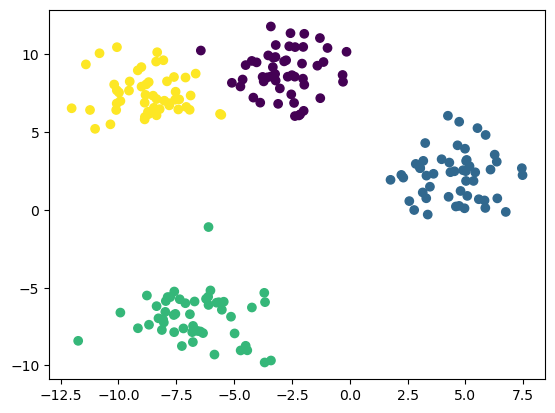

In [4]:
def scatter(X, y=None, ax=plt):
    ax.scatter(X[:,0], X[:,1], c=y)
scatter(X,y)

### The scikit-learn workflow
- initialize model
- fit ("train") model
- predict using model

In [5]:
# initialize
model = KMeans(4, random_state=0)

In [6]:
type(X)

numpy.ndarray

In [7]:
# train
model.fit(X)

/Users/merjahe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [8]:
# predict
y = model.predict(X)
y

array([1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 3, 0, 2, 2, 2, 2,
       0, 3, 0, 3, 3, 2, 3, 1, 2, 2, 0, 0, 3, 1, 0, 1, 0, 3, 2, 3, 2, 2,
       0, 1, 1, 2, 1, 3, 0, 3, 0, 1, 3, 3, 2, 2, 3, 1, 0, 1, 2, 0, 0, 2,
       1, 3, 0, 3, 3, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 1, 2, 0, 0, 0, 0, 3,
       1, 0, 2, 3, 1, 1, 1, 0, 3, 1, 2, 3, 0, 0, 3, 2, 3, 1, 0, 2, 2, 0,
       1, 2, 3, 0, 3, 0, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 3, 1, 1, 3, 2, 2,
       3, 0, 0, 1, 2, 2, 3, 2, 1, 3, 0, 1, 1, 3, 1, 0, 2, 2, 3, 0, 1, 0,
       2, 0, 0, 1, 1, 1, 3, 1, 1, 0, 3, 2, 1, 1, 2, 1, 0, 3, 2, 2, 1, 2,
       1, 3, 3, 2, 3, 2, 0, 0, 0, 3, 1, 1, 1, 3, 3, 2, 0, 0, 3, 0, 1, 3,
       2, 1], dtype=int32)

The model here is itself a python *object*, and can thus have certain attributes, such as the centroids locations:

In [9]:
centroids = model.cluster_centers_
centroids

array([[-8.66066413,  7.5046551 ],
       [ 4.55617572,  2.22813176],
       [-6.69118023, -6.89411831],
       [-2.72328916,  8.8186043 ]])

In [10]:
# Make a function for common plot formatting
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='black')
    ax.set_ylabel('feature 2', color='black')
    ax.set_title(title, color='black')

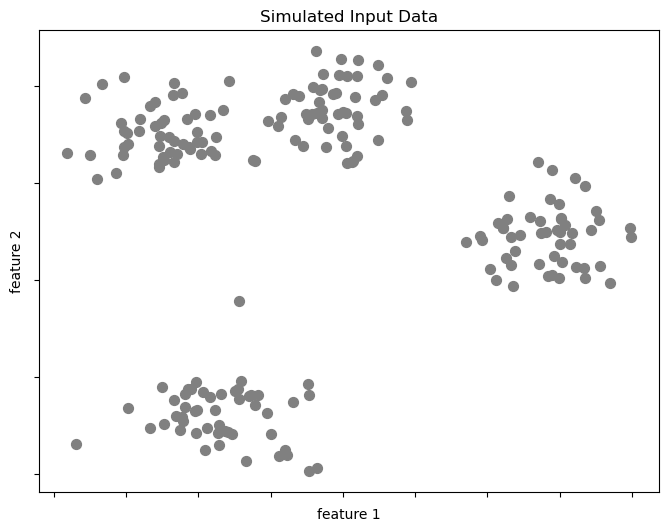

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Simulated Input Data')

plt.show()
# fig.savefig('assets/k-means-clustering-1.png')

#### Exercise 1.Plot the data with color-coded cluster labels and star-shaped cluster centroids

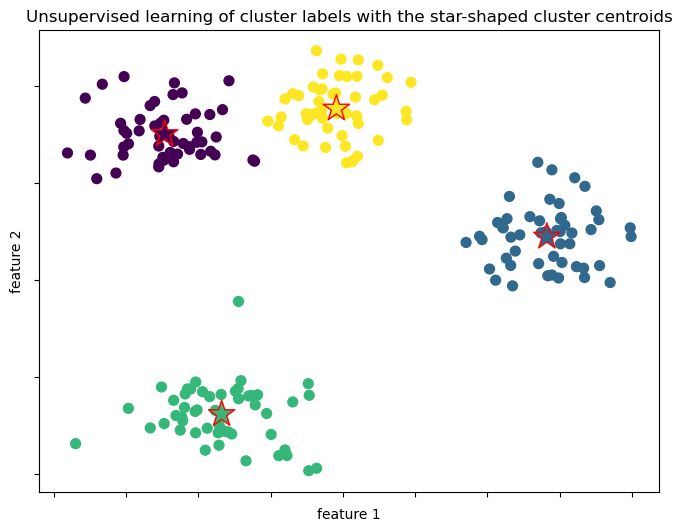

In [12]:
#example of a solution
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400, c=range(4), cmap='viridis', edgecolors = 'red')

# format the plot
format_plot(ax, 'Unsupervised learning of cluster labels with the star-shaped cluster centroids')

plt.show()

### Another example where we specify the mean and variance to generate a bit more complicated clustering task

In [13]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3],
     ])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

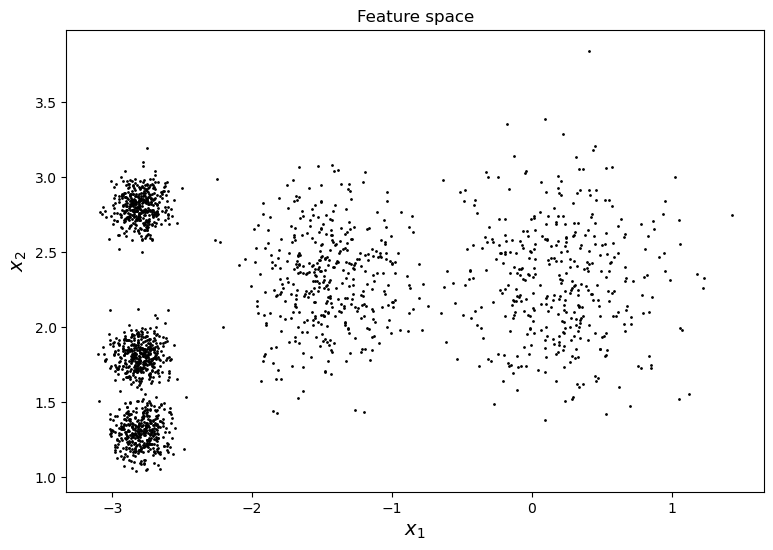

In [14]:
X2, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

def plot_clusters(X, y=None):
    if y==None:
        plt.scatter(X[:, 0], X[:, 1], c='k', s=1)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=1)        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=90)
    
plt.figure(figsize=(9, 6))
plot_clusters(X2)
plt.title('Feature space')
plt.show()

Notice that we have three compact clusters on the left. However, they only separate based on x2 feature. There are also two clusters that have higher variability.

In [15]:
K = 5
model2 = KMeans(n_clusters=K, n_init=1, random_state=42)
model2.fit(X2)
y2 = model2.predict(X2)


### Visualizing the decision boundaries -  _Voronoi_ diagrams

In [16]:
# don't worry about this code, we provide it to make a more visual representation of cluster assignments

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

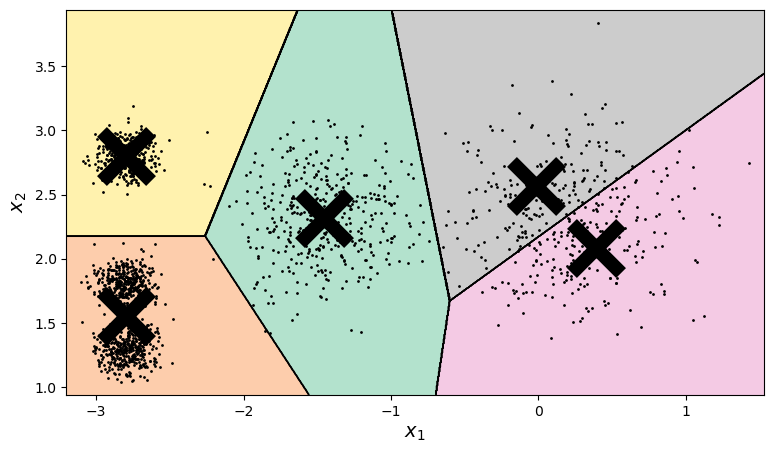

In [17]:
plt.figure(figsize=(9, 5))
plot_decision_boundaries(model2, X2)

plt.show()

Did you obtain a good result?